# Bidirectional LSTM in Keras

Bidirectional LSTM has the same gated, RNN structure as regular LSTM except that instead of running unidirectionally over the data, like backward through time and using previous time steps or previous words to predict the current state, bidirectional LSTM runs both ways. It means that it can use information from the past and the future in a given state. In addition, that means that they can make use of both the beginning and the end of documents or reviews. So, in review sentiment analysis we have been biasing our models towards the end of documents or reviews, but with Bidirectional LSTM we can be using information from the beginning of the document and the end of the review.

- References:
    - [machinelearningmastery.com](https://machinelearningmastery.com/develop-bidirectional-lstm-sequence-classification-python-keras/#:~:text=Bidirectional%20LSTMs%20are%20an%20extension,LSTMs%20on%20the%20input%20sequence)
    - [medium.com](https://medium.com/@raghavaggarwal0089/bi-lstm-bc3d68da8bd0)

<br>

## Load dependencies

In [0]:
import tensorflow as tf
from sklearn.metrics import roc_auc_score, auc, roc_curve
import matplotlib.pyplot as plt 
import numpy as np

%matplotlib inline

<br>

<br>

## Load data

In [0]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)

<br>

<br>

## Preprocess data

In [0]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, 
                                                        maxlen=100, 
                                                        padding='pre', 
                                                        truncating='pre', 
                                                        value=0)

x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, 
                                                        maxlen=100, 
                                                        padding='pre', 
                                                        truncating='pre', 
                                                        value=0)

<br> 

## Bi-directional LSTM architecture

In [0]:
model = tf.keras.models.Sequential()

#  Embedding Layer(Taking Inputs) 
model.add(tf.keras.layers.Embedding(input_dim=10000, 
                                    output_dim=64, 
                                    input_length=100)) 

model.add(tf.keras.layers.SpatialDropout1D(0.2))


#  Bidirectional LSTM Layer 
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=256, 
                                                             dropout=0.2)))


# Output Layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [0]:
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 64)           640000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 100, 64)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 512)               657408    
_________________________________________________________________
dense (Dense)                (None, 1)                 513       
Total params: 1,297,921
Trainable params: 1,297,921
Non-trainable params: 0
_________________________________________________________________


<br>

#### Observation
- LSTM layer parameters is doubled in comparison to LSTM due to both reading directions

<br>

<br>


## Configure model

In [0]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

## Train!

In [0]:
history = model.fit(x_train,
                    y_train, 
                    batch_size=128,
                    epochs=10, 
                    verbose=1, 
                    validation_split=0.1)

Epoch 1/10
176/176 [==============================] - 9s 50ms/step - loss: 0.5712 - accuracy: 0.6926 - val_loss: 0.3769 - val_accuracy: 0.8356
Epoch 2/10
176/176 [==============================] - 8s 46ms/step - loss: 0.3111 - accuracy: 0.8720 - val_loss: 0.3490 - val_accuracy: 0.8476
Epoch 3/10
176/176 [==============================] - 8s 46ms/step - loss: 0.2448 - accuracy: 0.9051 - val_loss: 0.3571 - val_accuracy: 0.8436
Epoch 4/10
176/176 [==============================] - 8s 46ms/step - loss: 0.2035 - accuracy: 0.9236 - val_loss: 0.4205 - val_accuracy: 0.8376
Epoch 5/10
176/176 [==============================] - 8s 46ms/step - loss: 0.1740 - accuracy: 0.9357 - val_loss: 0.3936 - val_accuracy: 0.8368
Epoch 6/10
176/176 [==============================] - 8s 46ms/step - loss: 0.1450 - accuracy: 0.9492 - val_loss: 0.4547 - val_accuracy: 0.8312
Epoch 7/10
176/176 [==============================] - 8s 45ms/step - loss: 0.1193 - accuracy: 0.9579 - val_loss: 0.5571 - val_accuracy: 0.8240

<br>

<br>

## Plotting the accuracy 


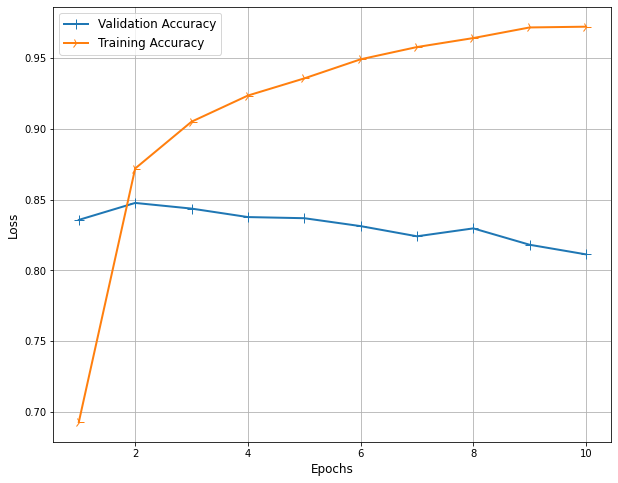

In [0]:
plt.figure(figsize=(10,8))
history_dict = history.history   

loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation Accuracy')
line2 = plt.plot(epochs, loss_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs', fontsize=12) 
plt.ylabel('Loss', fontsize=12)
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.show()

## Evaluate

In [0]:
score = model.evaluate(x_test, y_test)

print(f'Test Loss: {score[0]}')
print(f'Test Accuracy: {score[1]}\n\n')

782/782 [==============================] - 6s 8ms/step - loss: 0.6401 - accuracy: 0.8205
Test Loss: 0.640113890171051
Test Accuracy: 0.8205199837684631




In [0]:
y_hat = model.predict(x_test)


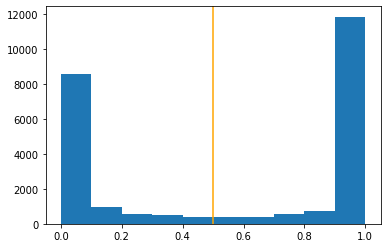

In [0]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

<br>

## Visualizing ROC

Area Under the Curve: 90.28




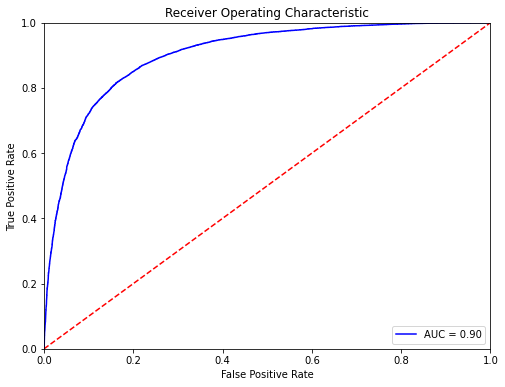

In [0]:
pct_auc = roc_auc_score(y_test, y_hat)*100.0
print(f'Area Under the Curve: {pct_auc:0.2f}\n\n')

plt.figure(figsize=(8,6))

fpr, tpr, threshold = roc_curve(y_test, y_hat)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = f'AUC = {roc_auc:0.2f}')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<br>

---

<br>

<br>

# Stacked Bidirectional LSTM in Keras

<br>

## Load dependencies

In [0]:
import tensorflow as tf
from sklearn.metrics import roc_auc_score, auc, roc_curve
import matplotlib.pyplot as plt 
import numpy as np

%matplotlib inline

<br>

<br>

## Load data

In [0]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)

<br>

<br>

## Preprocess data

In [0]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, 
                                                        maxlen=200, 
                                                        padding='pre', 
                                                        truncating='pre', 
                                                        value=0)

x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, 
                                                        maxlen=200, 
                                                        padding='pre', 
                                                        truncating='pre', 
                                                        value=0)

<br> 

## Stacked-bidirectional LSTM architecture

In [0]:
model = tf.keras.models.Sequential()

# Embedding Layer(Taking Inputs)
model.add(tf.keras.layers.Embedding(input_dim=10000,
                                    output_dim=64, 
                                    input_length=200)) 
model.add(tf.keras.layers.SpatialDropout1D(0.2))

# Bidirectional LSTM Layer 
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=64, 
                                                             dropout=0.2, 
                                                             return_sequences=True))) # retain temporal dimension
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=64, 
                                                             dropout=0.2)))

#  Output Layer 
model.add(tf.keras.layers.Dense(units=1, 
                                activation='sigmoid'))

## Configure model

In [0]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

## Train!

In [6]:
history = model.fit(x_train,
                    y_train, 
                    batch_size=128,
                    epochs=10, 
                    verbose=1, 
                    validation_split=0.1)

Epoch 1/10
176/176 [==============================] - 35s 199ms/step - loss: 0.4469 - accuracy: 0.7717 - val_loss: 0.3075 - val_accuracy: 0.8740
Epoch 2/10
176/176 [==============================] - 32s 181ms/step - loss: 0.2363 - accuracy: 0.9073 - val_loss: 0.2922 - val_accuracy: 0.8728
Epoch 3/10
176/176 [==============================] - 32s 180ms/step - loss: 0.1789 - accuracy: 0.9352 - val_loss: 0.3346 - val_accuracy: 0.8568
Epoch 4/10
176/176 [==============================] - 32s 180ms/step - loss: 0.1297 - accuracy: 0.9548 - val_loss: 0.3361 - val_accuracy: 0.8568
Epoch 5/10
176/176 [==============================] - 31s 178ms/step - loss: 0.0992 - accuracy: 0.9659 - val_loss: 0.4175 - val_accuracy: 0.8520
Epoch 6/10
176/176 [==============================] - 31s 178ms/step - loss: 0.0814 - accuracy: 0.9724 - val_loss: 0.4407 - val_accuracy: 0.8556
Epoch 7/10
176/176 [==============================] - 31s 178ms/step - loss: 0.0655 - accuracy: 0.9790 - val_loss: 0.4680 - val_ac

<br>

<br>

## Plotting the accuracy 


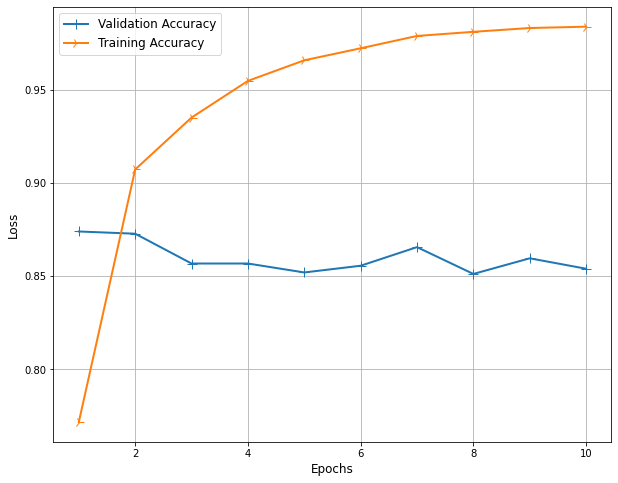

In [7]:
plt.figure(figsize=(10,8))
history_dict = history.history   

loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation Accuracy')
line2 = plt.plot(epochs, loss_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs', fontsize=12) 
plt.ylabel('Loss', fontsize=12)
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.show()

## Evaluate

In [8]:
score = model.evaluate(x_test, y_test)

print(f'Test Loss: {score[0]}')
print(f'Test Accuracy: {score[1]}\n\n')

782/782 [==============================] - 56s 71ms/step - loss: 0.5880 - accuracy: 0.8517
Test Loss: 0.587972104549408
Test Accuracy: 0.8517199754714966




In [0]:
y_hat = model.predict(x_test)

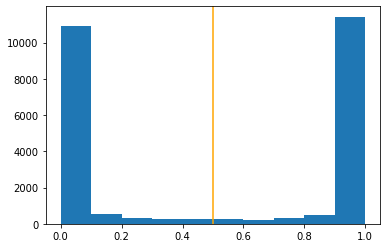

In [10]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

<br>

## Visualizing ROC

Area Under the Curve: 92.52




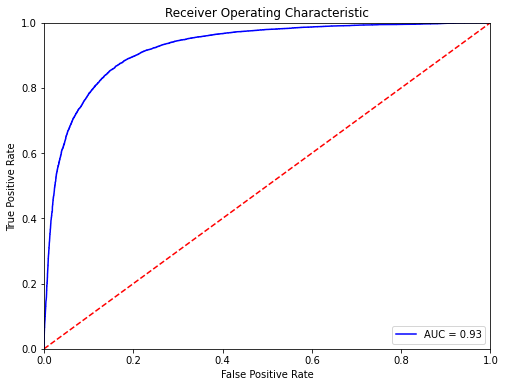

In [11]:
pct_auc = roc_auc_score(y_test, y_hat)*100.0
print(f'Area Under the Curve: {pct_auc:0.2f}\n\n')

plt.figure(figsize=(8,6))

fpr, tpr, threshold = roc_curve(y_test, y_hat)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = f'AUC = {roc_auc:0.2f}')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<br>

---

<br>